In [239]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [240]:
# loading dataset
df = pd.read_csv("bbc-text.csv")

C:\Users\WorkPlace\anaconda3\envs\SystemyWyszukiwania\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

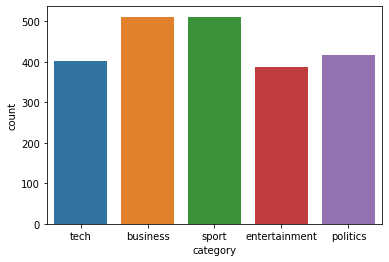

In [241]:
sns.countplot(df.category)

In [242]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [243]:
df['category'].value_counts()
X = list(df['text'])
y = list(df['category'])


In [244]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_stats = tfidf.fit_transform(X)
tfidf_tokens = tfidf.get_feature_names()
tfidf_vect = pd.DataFrame(data=tfidf_stats.toarray(), columns = tfidf_tokens)

print(tfidf_vect)

       00       000  000 000  000 barrels  000 cars  000 civil  \
0     0.0  0.024458      0.0          0.0       0.0        0.0   
1     0.0  0.032118      0.0          0.0       0.0        0.0   
2     0.0  0.000000      0.0          0.0       0.0        0.0   
3     0.0  0.000000      0.0          0.0       0.0        0.0   
4     0.0  0.000000      0.0          0.0       0.0        0.0   
...   ...       ...      ...          ...       ...        ...   
2220  0.0  0.000000      0.0          0.0       0.0        0.0   
2221  0.0  0.076927      0.0          0.0       0.0        0.0   
2222  0.0  0.038574      0.0          0.0       0.0        0.0   
2223  0.0  0.027652      0.0          0.0       0.0        0.0   
2224  0.0  0.000000      0.0          0.0       0.0        0.0   

      000 complaints  000 copies  000 fans  000 fine  ...  zealand summer  \
0                0.0         0.0       0.0       0.0  ...             0.0   
1                0.0         0.0       0.0       0.0 

C:\Users\WorkPlace\anaconda3\envs\SystemyWyszukiwania\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [245]:
Labelencoder = LabelEncoder()
y = Labelencoder.fit_transform(y)


In [246]:
countvectorizer = CountVectorizer(analyzer='word', stop_words='english')

In [247]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vect, y, train_size= .8, random_state = 1410)

In [252]:
model = LogisticRegression(multi_class="multinomial")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        98
           1       1.00      0.99      0.99        86
           2       0.97      0.99      0.98        77
           3       0.99      1.00      1.00       100
           4       1.00      0.95      0.98        84

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



In [251]:

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        98
           1       1.00      0.92      0.96        86
           2       0.97      0.94      0.95        77
           3       0.96      1.00      0.98       100
           4       0.99      0.94      0.96        84

    accuracy                           0.96       445
   macro avg       0.97      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445

